In [75]:
from ultralytics import YOLO
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [76]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
import yaml


def load_yaml(fpath):
  with open(fpath, 'r') as file:
    config = yaml.safe_load(file)
    return config

base_config = load_yaml("base.yml")
cnn_config = load_yaml("config.yml")
base_config.update(cnn_config)
config = Cfg(base_config)
config['cnn']['pretrained']=False
config['device'] = "cuda"
detector = Predictor(config)

In [77]:
advertise_detection = YOLO(r"best.pt")

In [78]:
paddle = PaddleOCR(use_angle_cls=False, lang="vi", use_gpu=False)

[2024/06/28 13:40:31] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/edabk-lab/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/edabk-lab/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_lengt

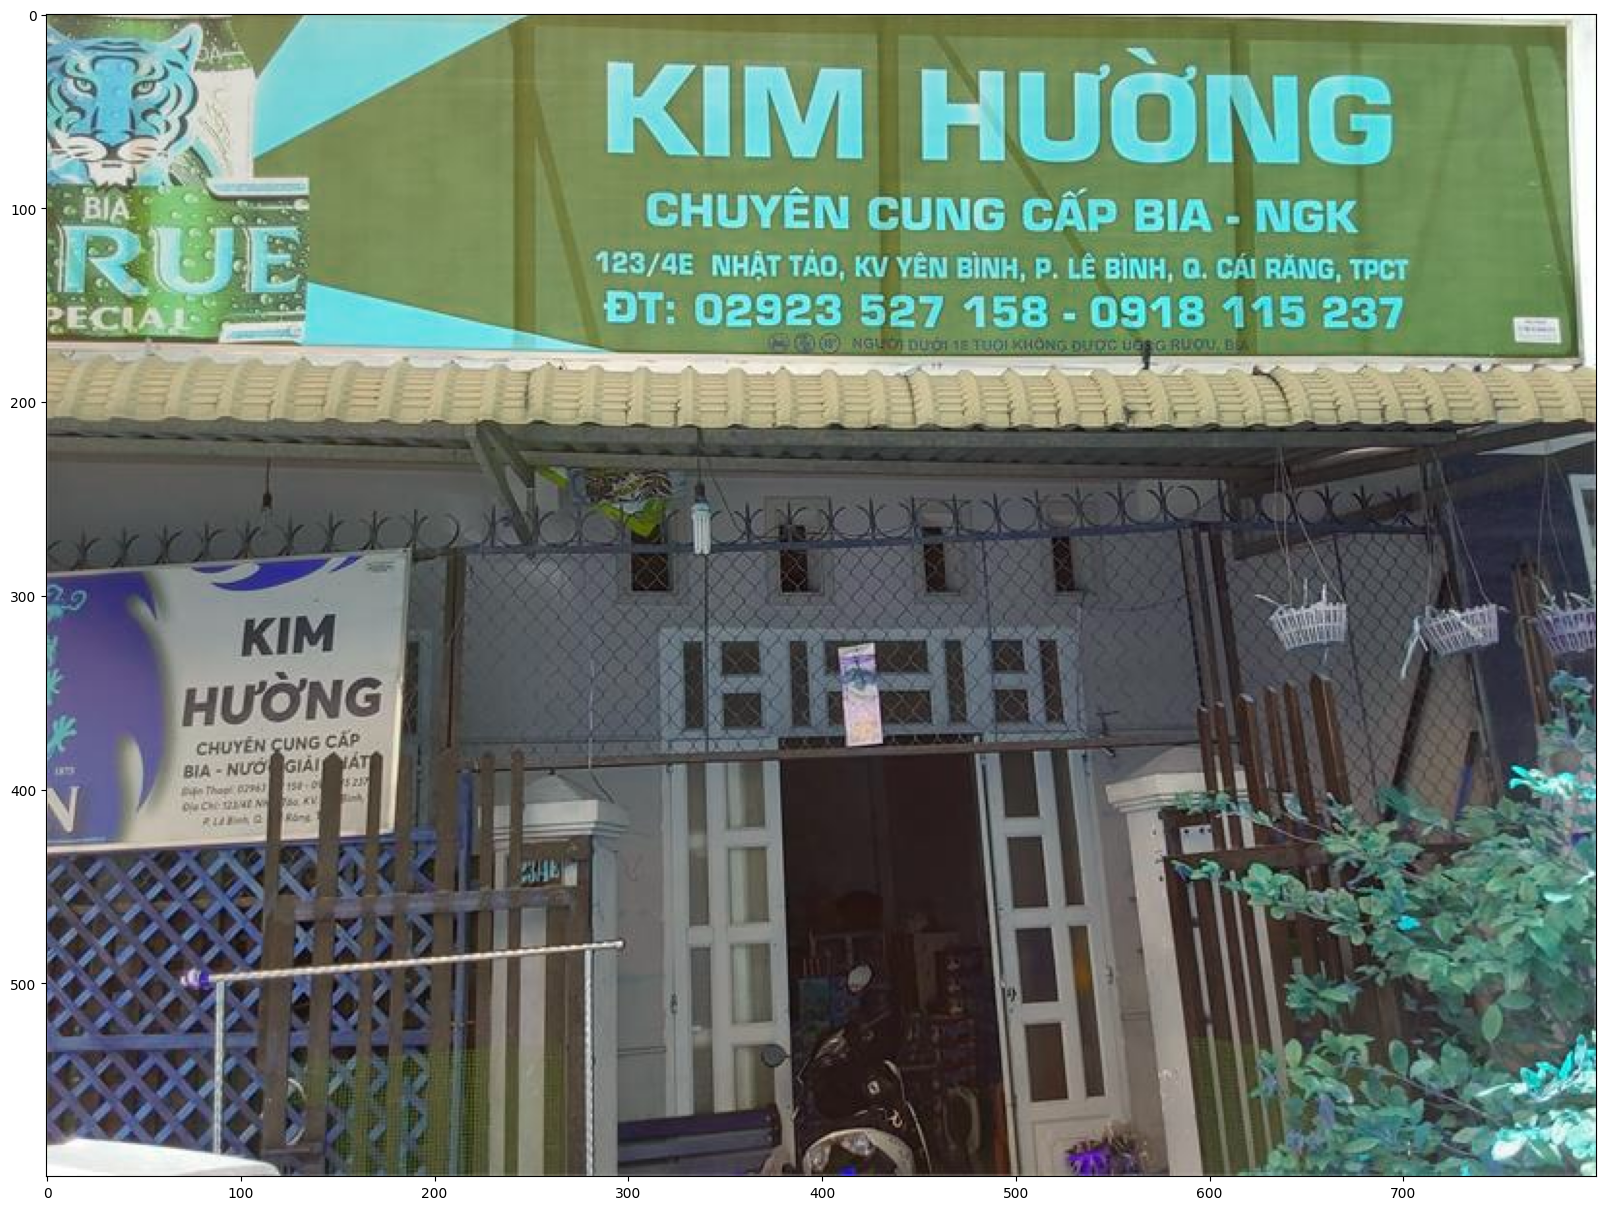

In [96]:
image_path = r'/home/edabk-lab/khoinghiem/heniken/backup/Images/data_thung_bia/images/train/66505089_1706013028479.jpg'
img = cv2.imread(image_path)
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()

In [97]:
advertise_res = advertise_detection(image_path)



image 1/1 /home/edabk-lab/khoinghiem/heniken/backup/Images/data_thung_bia/images/train/66505089_1706013028479.jpg: 480x640 2 billboards, 1 poster, 10.9ms
image 1/1 /home/edabk-lab/khoinghiem/heniken/backup/Images/data_thung_bia/images/train/66505089_1706013028479.jpg: 480x640 2 billboards, 1 poster, 10.9ms
Speed: 8.3ms preprocess, 10.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
Speed: 8.3ms preprocess, 10.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


In [98]:
advertise_boxes = advertise_res[0].boxes

-------- ORIGIN ------------


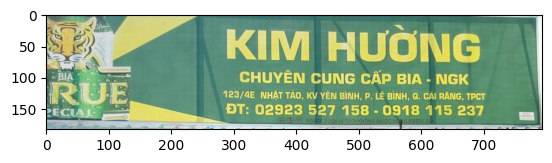

[2024/06/28 14:45:50] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.08178973197937012
[2024/06/28 14:45:50] ppocr DEBUG: rec_res num  : 8, elapsed : 0.3697361946105957
Num text detected:  8
Box coordinates: [[472, 159], [183, 181]]
Invalid box coordinates, skipping: [[472, 159], [183, 181]]
Box coordinates: [[283, 136], [183, 168]]
Invalid box coordinates, skipping: [[283, 136], [183, 168]]
Box coordinates: [[0, 142], [85, 171]]
----------TEXT-----------


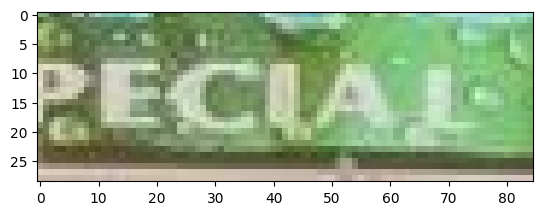

OCR result for cropped image: PECIATE
Processed text: peciate
Box coordinates: [[279, 114], [183, 144]]
Invalid box coordinates, skipping: [[279, 114], [183, 144]]
Box coordinates: [[0, 101], [138, 151]]
----------TEXT-----------


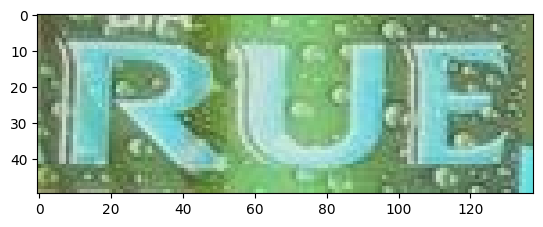

OCR result for cropped image: RUE
Processed text: rue
Box coordinates: [[305, 85], [183, 118]]
Invalid box coordinates, skipping: [[305, 85], [183, 118]]
Box coordinates: [[0, 83], [55, 114]]
----------TEXT-----------


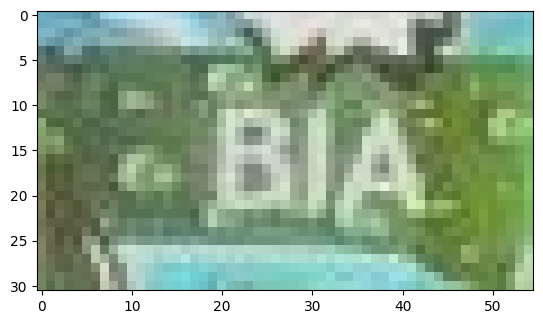

OCR result for cropped image: EBA
Processed text: eba
Box coordinates: [[282, 17], [183, 82]]
Invalid box coordinates, skipping: [[282, 17], [183, 82]]
-------- ORIGIN ------------


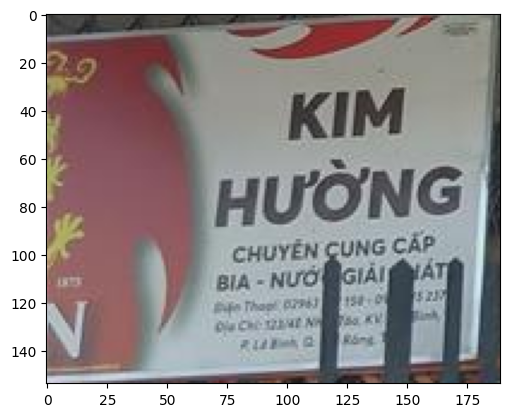

[2024/06/28 14:45:51] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.034918785095214844
[2024/06/28 14:45:51] ppocr DEBUG: rec_res num  : 7, elapsed : 0.10816502571105957
Num text detected:  5
Box coordinates: [[118, 99], [146, 120]]
----------TEXT-----------


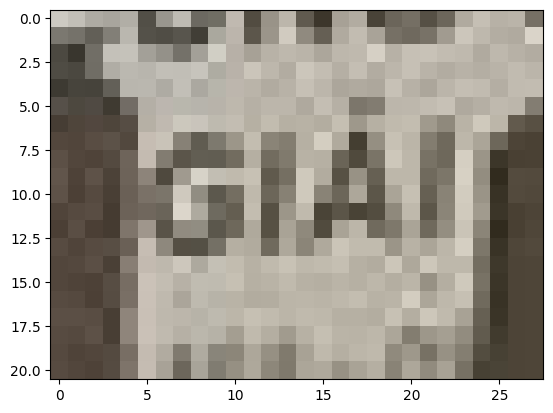

OCR result for cropped image: GIẢI
Processed text: giai
Box coordinates: [[62, 100], [121, 120]]
----------TEXT-----------


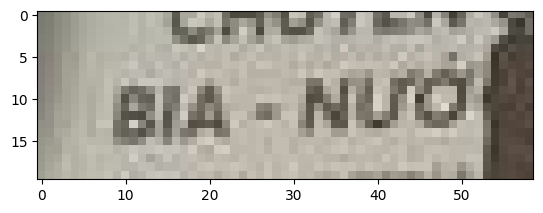

OCR result for cropped image: BIA - NƯƠC
Processed text: bia-nuoc
Box coordinates: [[68, 90], [154, 106]]
----------TEXT-----------


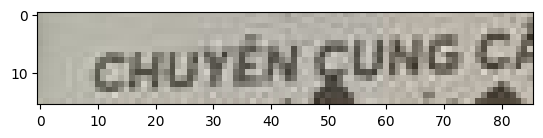

OCR result for cropped image: CHUYỂN CUNG CA
Processed text: chuyencungca
Box coordinates: [[62, 59], [154, 89]]
----------TEXT-----------


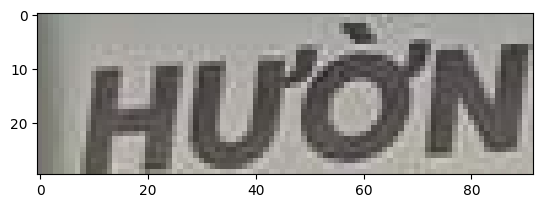

OCR result for cropped image: HƯỜN
Processed text: huon
Box coordinates: [[93, 24], [154, 58]]
----------TEXT-----------


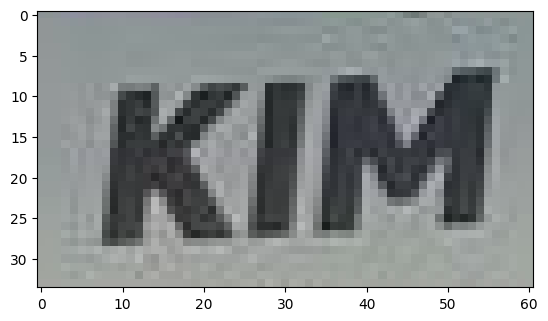

OCR result for cropped image: KIM
Processed text: kim
-------- ORIGIN ------------


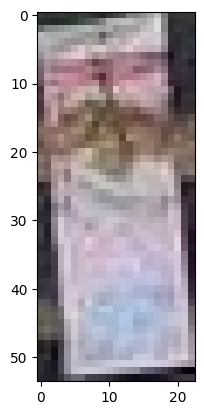

[2024/06/28 14:45:51] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.02206134796142578
[2024/06/28 14:45:51] ppocr DEBUG: rec_res num  : 0, elapsed : 4.76837158203125e-07
No text detected.
Final detected texts: ['peciate', 'rue', 'eba', 'giai', 'bia-nuoc', 'chuyencungca', 'huon', 'kim']


In [99]:
from unidecode import unidecode

texts = []
for obj in advertise_boxes:
    xyxy = obj.xyxy.squeeze()
    x1, y1, x2, y2 = map(int, xyxy)
    advertise_img = img[y1: y2, x1: x2].copy()
    w, h, _ = advertise_img.shape
    print("-------- ORIGIN ------------")
    plt.imshow(cv2.cvtColor(advertise_img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # Detect text
    result = paddle.ocr(advertise_img, cls=False, det=True)
    
    if result and result[0]:
        result = result[0]
    else:
        print("No text detected.")
        continue
    
    boxes = []
    for line in result:
        line = line[0]
        boxes.append([[int(line[0][0]), int(line[0][1])], [int(line[2][0]), int(line[2][1])]])

    boxes = boxes[::-1]

    EXPEND = 5
    for box in boxes:
        box[0][0] = max(0, box[0][0] - EXPEND)
        box[0][1] = max(0, box[0][1] - EXPEND)
        box[1][0] = min(w, box[1][0] + EXPEND)
        box[1][1] = min(h, box[1][1] + EXPEND)

    print("Num text detected: ", len(boxes))
    
    for box in boxes:
        print("Box coordinates:", box)
        
        # Ensure the box coordinates are valid
        if box[1][1] > box[0][1] and box[1][0] > box[0][0]:
            cropped_image = advertise_img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
            print("----------TEXT-----------")
        
            try:
                cropped_image = Image.fromarray(cropped_image)
                plt.imshow(cropped_image)
                plt.show()
            except Exception as e:
                print("Error displaying cropped image:", str(e))
                continue

            try:
                rec_result = detector.predict(cropped_image)
                print(f"OCR result for cropped image: {rec_result}")
                if rec_result:
                    text = rec_result #[0]
                    processed_text = unidecode(text.replace(" ", "").lower())
                    texts.append(processed_text)
                    print("Processed text:", processed_text)
                    
                else:
                    print("No text detected in cropped image.")
            except Exception as e:
                print("Error in text detection:", str(e))
        else:
            print("Invalid box coordinates, skipping:", box)

print("Final detected texts:", texts)